<a href="https://colab.research.google.com/github/julenbhy/keras_review_classificator/blob/main/review_classificator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Preparing the data

In [ ]:
#dataset obtention
from keras.datasets import imdb
import numpy as np


(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

#spliting the training data into training data and validation data
partial_x_train = x_train[10000:]
x_val = x_train[:10000]

partial_y_train = y_train[10000:]
y_val = y_train[:10000]

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the nda

# Building the network

In [ ]:
#neural network generation
from keras import layers
from keras import models

model = models.Sequential()
#add a dense layer with 16 hiden units and any number of inputs each with a len of 10000
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

from keras import optimizers
from keras import losses
from keras import metrics

#binary_crossentropy ass loss function because it is binary classification
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

#training 
history = model.fit(partial_x_train, partial_y_train,
                    epochs=4,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history


Epoch 1/4
30/30 [==============================] - 2s 32ms/step - loss: 0.5895 - acc: 0.7090 - val_loss: 0.3775 - val_acc: 0.8715
Epoch 2/4
30/30 [==============================] - 1s 20ms/step - loss: 0.3121 - acc: 0.9078 - val_loss: 0.3131 - val_acc: 0.8791
Epoch 3/4
30/30 [==============================] - 1s 19ms/step - loss: 0.2238 - acc: 0.9302 - val_loss: 0.2764 - val_acc: 0.8902
Epoch 4/4
30/30 [==============================] - 1s 19ms/step - loss: 0.1697 - acc: 0.9477 - val_loss: 0.2728 - val_acc: 0.8917




# Evaluating the network

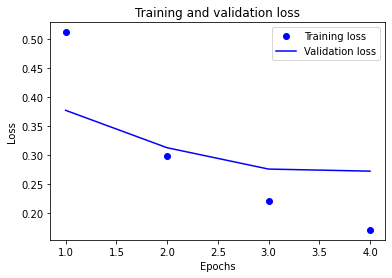

In [ ]:
#plot the loss evolution
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['acc']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

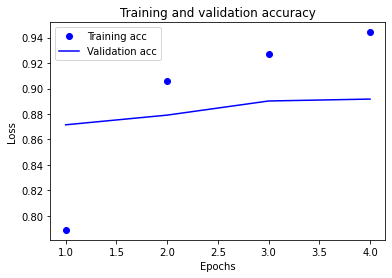

In [ ]:
#plot the accuracy evolution
plt.clf()

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
#Obtain the optimum number of epochs to avoid overfitting
max_accuracy = max(val_acc_values)
print ("Maximmum accuracy reached: ", max_accuracy)
max_index = val_acc_values.index(max_accuracy)
print("Maximmum accuracy reached at epoch: ",max_index+1)

Maximmum accuracy reached:  0.891700029373169
Maximmum accuracy reached at epoch:  4


In [ ]:
#Evaluate the model 
results = model.evaluate(x_test, y_test)
print(results)

782/782 [==============================] - 2s 2ms/step - loss: 0.2941 - acc: 0.8821
[0.29409319162368774, 0.8820800185203552]


# Testing the network

In [ ]:
#Generate prediction on "new data"
model.predict(x_test)


array([[0.21179003],
       [0.9993642 ],
       [0.9268    ],
       ...,
       [0.09641302],
       [0.14470674],
       [0.59042877]], dtype=float32)